# Basic Linear Regression with Numpy, Pandas, and Seaborn

In this series of posts, we will give an overview of suprvised learning using Python. We will use pandas, seaborn, and matplotlib to explore data, and numpy to implement learning algorithms and perform matrix calculations.

The goal of the posts will be to give practical ways to visualize and implement machine learning and AI concepts.

The key to understanding machine learning is building an intuition of the underlying math. The key to applying machine learning is to be able to actually implement the models. Understanding the math and basic implementations of the models will let you use any library, programming language, or computing platform.


This post will introduce the <strong>linear model and the least squares method</strong>. The next posts will go through nearest neighbors, statistical decision theory, problems with high dimensions, statistical models, and basic model selection. We will use The Elements of Statiscal Learning (Hastie, Tibshirani, and Friedman) for reference.
Freely available here: https://web.stanford.edu/~hastie/ElemStatLearn/

______________________________________________________________

Supervised learning's goal is to use input to predict the value of an output.

The elements of dataset $T$ can be described with two vectors $X$ and $Y$. The goal of supervised learning is for any new $X$, find $\widehat{Y}$ (prediction for $Y$). The domain of $Y$ and $\widehat{Y}$ will be the same.

Notice that $X$ and $Y$ are vectors.
__________________________________


In the linear model, we will try to predict $Y$  by <em>assuming</em> it has a linear relationship with $X$. This is a pretty big assumption about the relationship of the variables, especially because the world is usually much more complicated. 

However, this does lead to pretty stable predictions, and with a little tweaking with things like kernel methods and regularization (which we will discuss later), the linear model becomes quite powerful in real life applications.

The linear model can be written as:

$\widehat{Y}=\widehat{\beta _{0}}+\sum_{j=1 }^{p}(X_{j}\widehat{\beta_{j}})$ 

which can be written in <strong>matrix form</strong> as 

$\widehat{Y}=X^{T}\widehat{\beta}$

$\widehat{Y}$ is the output prediction, and is a vector of k elements, and $\widehat{\beta}$ is a (p x k) matrix. $X$ is a (column) vector of p elements.

In the above equation, notice how we took $\widehat{Y}=\widehat{\beta _{0}}$ and just merged it into the $\widehat{\beta}$. This means that $\widehat{\beta}$ now has p+1 elements, so we have to make sure that we append an element on to $X$ such that 

$X=<{\color{Blue} X_0},X_1, X_2, X_3,...X_p>$ and $\beta=
\begin{bmatrix}
 &{\color{Blue} \beta_{00}} &... &{\color{Blue} \beta_{0k}}   \\ 
 &\beta_{10}  &...  &\beta_{1k} \\ 
 &\beta_{20}  &...  &\beta_{2k} \\ 
 &... &... &... \\
 &\beta_{p0}  & &\beta_{pk}   
\end{bmatrix}$



Let's start our first python implementation with a function definition!

In [100]:
#input: Beta will be our input matrix of size p x k (p rows, k columns)
#input: X will be out input for which we want a prediction, this will be of size
#   p x 1 (so it will be a column vector)
#output: Y will be a matrix of size 1 x k
def FirstLinearModelPredictor(Beta, X):
    return Y

We will fill out the function above as we learn more! Calling the function now will throw an error. 

Notice that X is a single column vector and Y is a single row vector. This can obviously be extended and optimized for batch predictions, but to stick closely to the math, we will keep it one input and one prediction for now.

Before we flesh out FirstLinearModelPredictor, let's get some data and work towards a goal:

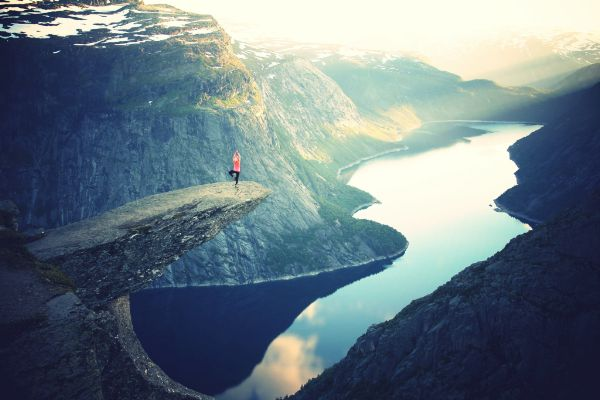

In [101]:
#First, import all of our dependencies
#if you don't know what the package does, do a quick google search. Don't worry about reading
#     the documentation, as this post will comment everything
import seaborn #this is for easy(easier) data visualization
import sklearn.datasets as DataSets #this has some toy datasets we can play around with
import pandas as pd #this is for data manipulation and easy visualization of relational data
import numpy as np #this is for scientific computing and working with efficient high dimensional data in python
import matplotlib.pyplot as plt #this is for some more custom data visualization, and showing the plot
from mpl_toolkits.mplot3d import Axes3D #this is for 3D plotting

In [102]:
#load the wine dataset
wineData=DataSets.load_wine()
#the set comes with a description, let's check it out!
#don't worry about reading all of it, but it is pretty informative
print(wineData['DESCR'])

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [103]:
#let's see what our data looks like
#first, we are going to concatenate the data and the target...our Y
data= np.c_[wineData['data'], wineData['target']]

#next, make a dataframe using the data above, and set the column names using the feature names from
#     the wine dataset and by appending the label 'target' to the names
wineDataFrame = pd.DataFrame(data,
                     columns= wineData['feature_names'] + ['target'])

#see what it looks like. Nice and clean and, on the right, we can see the label for each data point
#notice that the number of elements in the input (p) =13, and the number of elements per prediction (k) =1.
wineDataFrame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0.0


In [104]:
#this is a useful function that pandas provides to describe each column in the dataset. If you don't
#     have a handy description provided, this can be a useful first step to explore the table(s)
wineDataFrame.describe(include='all')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


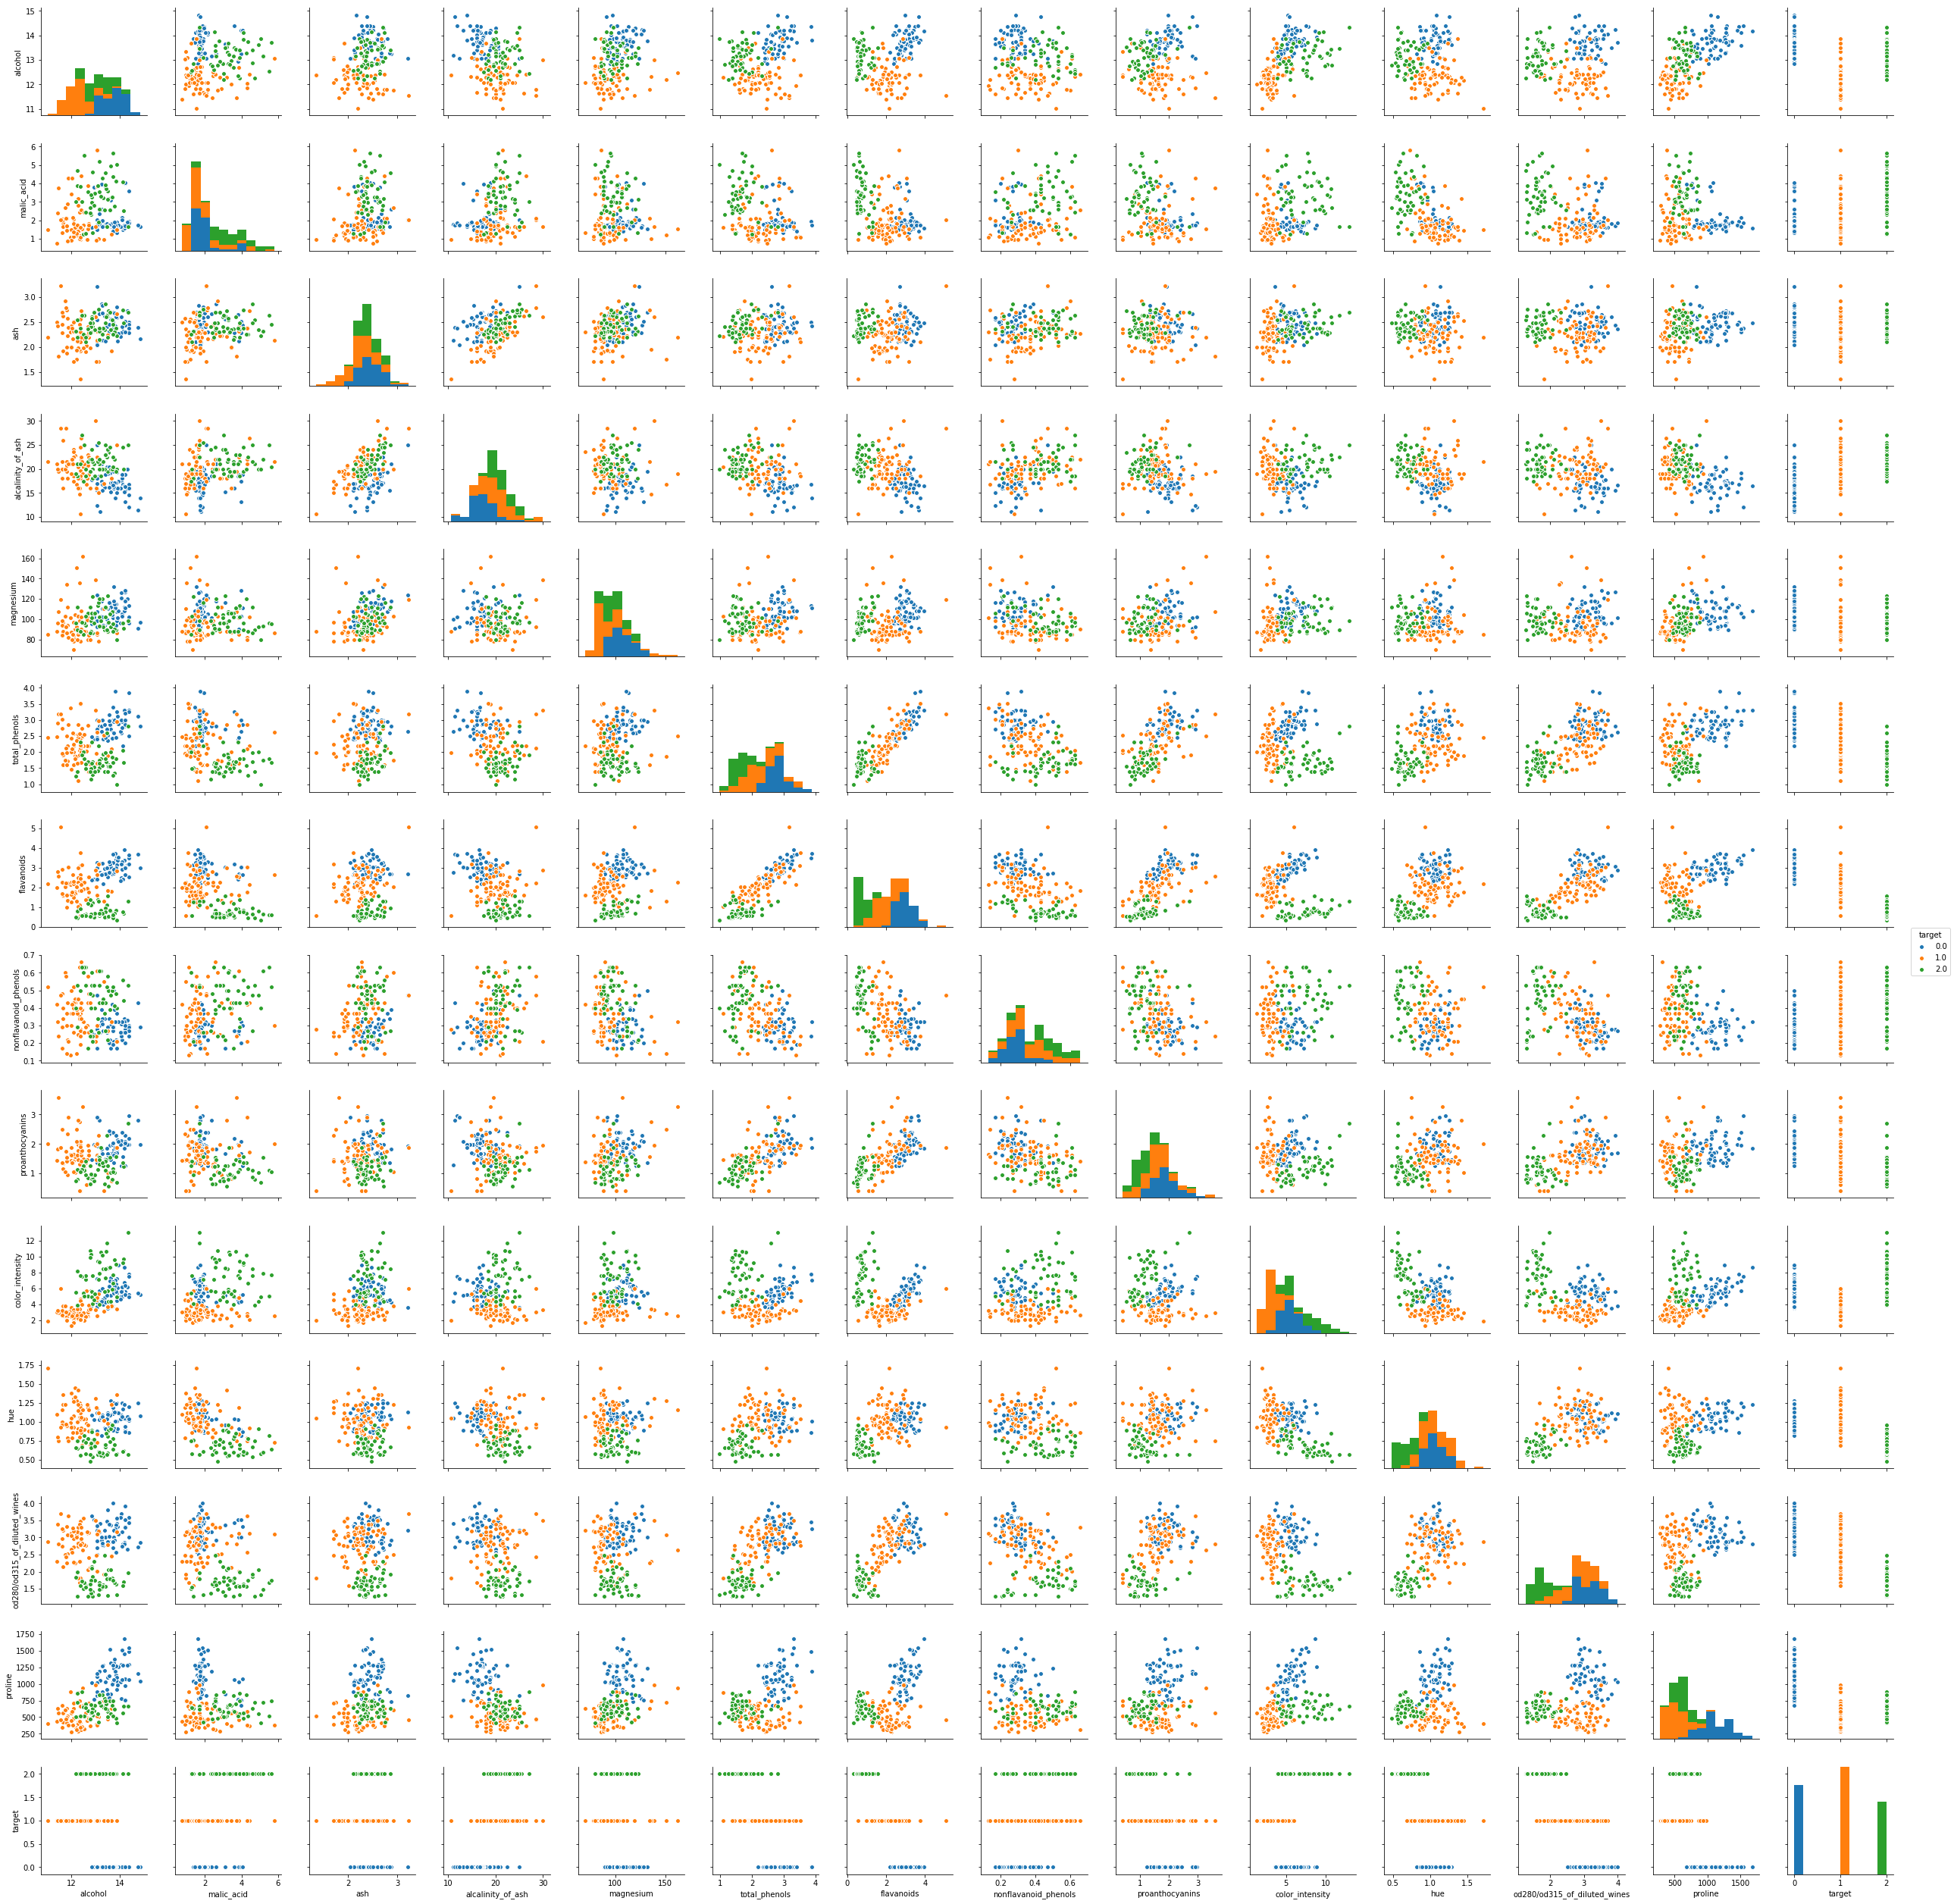

In [111]:
#to plot every variable with respect to every other variable, use this function.
#we color the points according to what their 'target' column value is
seaborn.pairplot(wineDataFrame, hue='target')
plt.show()
plt.close()

We can see in many of the variable pairs, there are some pretty distinct patterns we could build a classifier out of. Other pairings, the targets (values of 0,1,2) seem to be to shuffled. 

Our goal is to build a model with a input consisting of all 13 dimensions (alcohol, ash, magnesium, etc...) and an output of the target value (0, 1, or 2...each corresponding to a different winery).

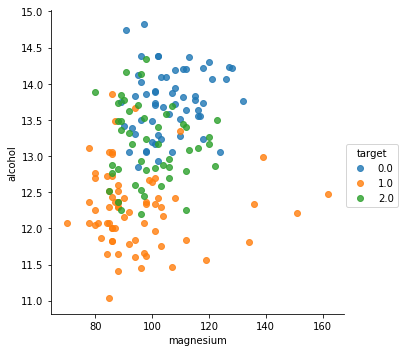

In [106]:
#let's now take a small subset (feature wise) of our data...we must make sure to include
#     the target variable
wineDataFrameSubset=wineDataFrame[['alcohol', 'magnesium', 'target', 'ash']]

#Let's plot just the magnesium and alcohol
seaborn.lmplot('magnesium', 'alcohol', data=wineDataFrameSubset, fit_reg=False, hue='target')
plt.show()
plt.close()

Looking at the data more closely, we can see that even though the data seems to be generally segmented into the 3 different classes, there is quite a bit of noise at the borders of each class. This is where a machine learned model can come in handy, especially if the data is vastly more complicated or if the size of the input is very, very large (think text, genomes, weather, etc that have many, many elements in the input vector).

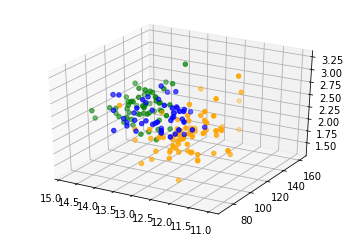

In [107]:
#Now let's plot a 3d model to see how 3 variables (alcohol, magnesium, and ash) interact with eachother
#    and with the 3 different output classes


#take the subset dataframe and make it into a numpy matrix
df_to_np=wineDataFrameSubset.as_matrix()

#splice the column for each variable
alc=df_to_np[:,0]
mag=df_to_np[:,1]
tar=df_to_np[:,2]
ash=df_to_np[:,3]
#assign a color to each set of variables based on the target class (important to retain the order)
code=['green', 'orange', 'blue']
colors=[code[int(elem)] for elem in tar]

#make a new figure and plot the 3d scatter plot. Set the colors based on the colors list we made above
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(alc, mag, ash, c=colors)

#this is just to have the same x-y orientation as the graph above
plt.gca().invert_xaxis()

plt.show()
plt.close()

Notice that with the addition of a 3rd variable, visually separating the data into 3 different classes becomes much more difficult. With even more dimensions, this becomes even harder.

Naturally, you ask why we don't just plot variable pairs like we did above and segment out classes visually. In many cases, with higher dimensional data, nice segmentations or correlations that actually lead to correct predictions are much harder to find visually...and they usually involve more than just 2 dimensions.

Finally, let's visualize the relationship between alcohol, magnesium, and the 3 target variables:

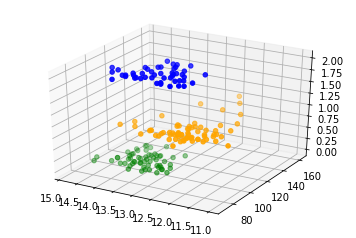

In [108]:
#make a new figure and plot the 3d scatter plot. Set the colors based on the colors list we made above
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(alc, mag, tar, c=colors)

#this is just to have the same x-y orientation as the graph above
plt.gca().invert_xaxis()

plt.show()
plt.close()

We can now (visually) think about this as a regression problem. How can we quantitatively predict Y based on the input variable X?

Let's first further simplify the problem to only consider alcohol and magnesium as the dimensions for input and consider only the 0 and 1 targets.

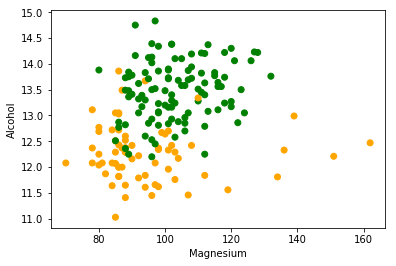

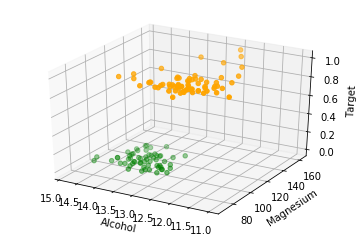

In [109]:
#filter out the '2' targets from our column vectors:

#filter out the data that has a 2 target, not too hard since the data's order was kept
alc2D=[alc[i] for i in range(0, len(tar)) if tar[i] != 2]
mag2D=[mag[i] for i in range(0, len(tar)) if tar[i] != 2]
tar2D=[tar[i] for i in range(0, len(tar)) if tar[i] != 2]

#assign a color to each set of variables based on the target class (important to retain the order)
code=['green', 'orange', 'blue']
colors2D=[code[int(elem)] for elem in tar2D]

#let's plot it in matplotlib this time so we can do some fancy coloring later
fig=plt.figure()
ax = fig.add_subplot(111)
ax.scatter(mag, alc, c=colors2D)
ax.set_xlabel('Magnesium')
ax.set_ylabel('Alcohol')

#also the 3d graph, put them in separate figures to show them at the same time
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(alc2D, mag2D, tar2D, c=colors2D)
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Magnesium')
ax2.set_zlabel('Target')
#this is just to have the same x-y orientation as the graph above
plt.gca().invert_xaxis()
    
plt.show()
plt.close()

Now, let's implement $\widehat{Y}=X^{T}\widehat{\beta}$

In [116]:
#pretty simple if we use numpy!
def FirstLinearModelPredictor(Beta, X):
    Y=X.dot(Beta)
    return Y

#Make the input matrix of alcohol and magnesium values
X=np.c_[alc2D,mag2D]
#append a '1' column for the intercept value
X=np.append(X, np.ones((X.shape[0],1)), axis=1)
#Let's make up some beta values and test using the dataset
predictedValues=FirstLinearModelPredictor(np.array([0.01,0.02,.02]),X)
predictedValues

array([ 2.7023,  2.152 ,  2.1716,  2.4237,  2.5124,  2.402 ,  2.0839,
        2.5806,  2.1083,  2.1186,  2.261 ,  2.0612,  1.9375,  1.9875,
        2.2038,  2.3963,  2.563 ,  2.4583,  2.3219,  2.4764,  2.6806,
        2.1893,  2.1771,  2.0485,  2.075 ,  2.6305,  2.0139,  2.033 ,
        2.2987,  2.0802,  2.1773,  2.2758,  2.2368,  2.7976,  2.3551,
        2.1548,  2.3528,  2.1105,  2.1107,  2.7222,  2.4956,  1.9541,
        2.1788,  2.2124,  2.2905,  2.3821,  2.2038,  2.179 ,  2.221 ,
        2.3194,  1.9905,  2.0383,  2.3782,  2.4577,  2.5174,  2.4756,
        2.5222,  2.1929,  2.3172,  1.9037,  2.1633,  2.1464,  2.0367,
        1.8837,  2.2217,  2.1037,  1.7111,  1.7037,  2.3534,  3.1621,
        2.2029,  1.8786,  1.8949,  2.9299,  2.1596,  2.0766,  1.8703,
        2.3784,  2.8633,  2.167 ,  1.86  ,  1.8672,  1.7008,  1.8505,
        2.0184,  2.1267,  1.9416,  1.8965,  1.8164,  1.5408,  1.7608,
        1.86  ,  1.7469,  1.9029,  2.0962,  3.3847,  2.8181,  1.8429,
        1.9037,  1.9

If you look at the equation we just implemented, you see that we just implemented a 3D plane...let's graph it and see:

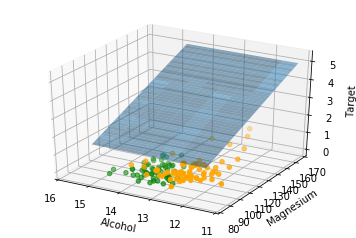

In [186]:
#Let's make a set of all points between the min and max bounds of our 2 input variables

#Let's make this a function since we are going to use it again later
def plotPointsAndPlane(inputMatrix, beta):
    h=0.5
    x_min, x_max = inputMatrix[:,0].min(), inputMatrix[:,0].max()
    y_min, y_max = inputMatrix[:,1].min(), inputMatrix[:,1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    #combine into a single input set
    yy_ravel=np.array(yy.ravel())
    xx_ravel=np.array(xx.ravel())
    X_Mesh=np.c_[xx_ravel,yy_ravel,np.ones(yy_ravel.shape[0])]
    #make predictions on this set
    predictedValues=FirstLinearModelPredictor(np.array(beta),X_Mesh)
    #reshape the set into the same shape as the graph's input so we have one output for every set of xx yy inputs
    predictedValues=predictedValues.reshape(xx.shape)

    #plot both the scatter plot of training (observation) points and graph the predicted 3D plane (called hyperplane)
    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111, projection='3d')
    ax3.scatter(alc2D, mag2D, tar2D, c=colors2D)
    ax3.plot_surface(xx, yy, predictedValues, alpha=0.5)

    ax3.set_xlabel('Alcohol')
    ax3.set_ylabel('Magnesium')
    ax3.set_zlabel('Target')

    #this is just to have the same x-y orientation as the graph above, and then to make the graph look nicer
    # plt.gca().invert_xaxis()
    ax3.set_ylim([80,170])
    ax3.set_xlim([16,11])

    plt.show()
    plt.close('all')
    
    
plotPointsAndPlane(X, [0.01,0.03,0.2])

Clearly, for the input space that we provided, the linear model did a terrible job at predicting the values of 1 and 0 for our two classes. We first need to get the correct values of $\widehat{\beta}$.

There are several different ways of doing this. In real life, where the dataset would be much bigger, we would use something called gradient descent (where you take the gradient of a function and follow it). We will cover this in detail in a later post.
For now, we can simply just write an equation to calculte the error from our estimate with respect to the true value of the input, and minimize this quantity with respect to $\widehat{\beta}$. This will just use some simple calculus.

Since we assume a linear model, we try to fit $\widehat{\beta}$ in $\widehat{Y}=X^{T}\widehat{\beta}$ to find the best $\widehat{Y}$. We define 'best' as one with the least error possible, and we measure error with the the residual sum of squares formula:

$RSS(\widehat{\beta})=\sum_{i=1 }^{N}(y_{i}-x_{i}^{T}\widehat{\beta_{i}})$ 

Note that this simply takes the difference between the actual value and the predicted value of each data point in the training set, squares it, and sums it up. We rewrite this to get rid of the sum notation, then differentiate:

$RSS(\widehat{\beta})=(Y-X\beta)^{T}(Y-X\beta)$ 

differentiate and set equal to 0:

$0=X^{T}(Y-X\beta)$

solve for $\widehat{\beta}$:

$\beta=(X^{T}X)^{-1}X^{T}Y$

Now that we have a solution for beta for any given $X$ and $Y$, we can implement this via numpy and pass it into our prediction function.


In [187]:
def getBeta(X, Y):
    Y=np.reshape(Y, (X.shape[0],1))
    xTx=np.transpose(X).dot(X)
    xInv=np.linalg.inv(xTx)
    xTy=np.transpose(X).dot(Y)
    return xInv.dot(xTy)

#let's do a quick test where we know what B is going to be
#let's solve the matrix equation below and then plug it into our predictor function to make sure it works
tX=np.array([[1,1],[2,1],[3,1]])
ty=np.array([[3,5,7]])
print(getBeta(tX,ty))
FirstLinearModelPredictor(getBeta(tX,ty),tX)

[[ 2.]
 [ 1.]]


array([[ 3.],
       [ 5.],
       [ 7.]])

Now we use the same code as above to graph our target points with respect to alcohol and magnesium. Except, this time, we are going to use our getBeta function instead of randomly guessing Beta

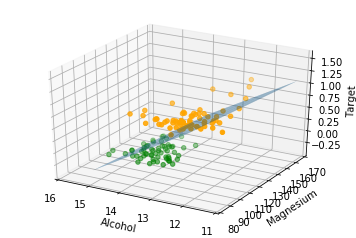

In [189]:
newBeta=getBeta(X,np.array(tar2D))
plotPointsAndPlane(X, newBeta)

Clearly, this is a much better fit! Let's visualize this in 2D by making a decision rule.
So far, we have used the getBeta and FirstLinearModelPredictor functions to predict where along the [0, 1] range an alcohol magnesium pair would fit. But a value like 0.77 doesn't tell is whether it is a 1 or 0. To solve this, we make a simple decision rule by setting some threshold $\tau$. The function decisionRule is implemented below...as you can guess it will be very simple.

In this case, we have just randomly come up with 0.5 for $\tau$, but in real life we can use simple (or sophisticated) search methods to find the absolute best $\tau$.

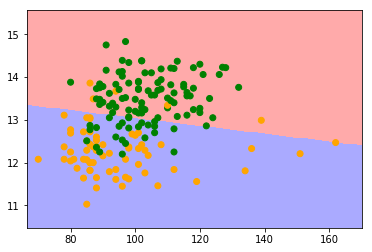

In [168]:
#Decision rule based on the predicted value from the FirstLinearModelPredictor funciton
def decisionRule(y):
    if y<0.5:
        return 0
    else:
        return 1

#Let's visualize what this decision rule looks like:

fig2=plt.figure()
ax = fig2.add_subplot(111)
from matplotlib.colors import ListedColormap
import random

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
h=0.02


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = mag.min()*0.95, mag.max()*1.05
y_min, y_max = alc.min()*0.95, alc.max()*1.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
B=getBeta(X,np.array(tar2D))
Z = np.array([decisionRule(FirstLinearModelPredictor(B, np.array([elem[1],elem[0],1]))) for elem in zip(xx.ravel(),yy.ravel())])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(mag, alc, c=colors2D)
    
    
plt.show()

As you can see, 0.5 was a good guess, but we can probably do better. Try running this code, and playing around with the values to see the result.

In this post we have made a rudimentary linear model for classify between two target variables using two features. This can be easily generalized into 3 or more target variables and any number of input variables. As we increase the number of parameters in the input variable, the computation time will increase expoentially. To deal with this, we are going to need a more powerful, efficient way of calculated Beta. We will cover this in the coming posts!